# Approximate Bayesian computation example

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
prior_min = -5 
prior_max = 5
true_mean = 0
nSamples = 5000
nTrue = 5000
true_data = np.zeros(nTrue)
drawSamples = lambda x: np.random.uniform(prior_min, prior_max, x)
simulator = lambda x: np.random.normal(x, 1)

In [4]:
mean_samples = drawSamples(nSamples)

In [5]:
for i in range(nTrue):
    true_data[i] = simulator(true_mean)

In [6]:
syn_data = simulator(mean_samples)

In [7]:
tol_1 = 1
tol_2 = 2
tol_3 = 5
ret_1 = []
ret_2 = []
ret_3 = []
for s in mean_samples:
    for td in true_data:
        if abs(s - td) <= tol_1:
            ret_1.append(s)
        if abs(s - td) <= tol_2:
            ret_2.append(s)
        if abs(s - td) <= tol_3:
            ret_3.append(s)

In [8]:
p1, _1 = np.histogram(ret_1, bins=20, range=(prior_min, prior_max), density=True)
p2, _2 = np.histogram(ret_2, bins=20, range=(prior_min, prior_max), density=True)
p3, _3 = np.histogram(ret_3, bins=20, range=(prior_min, prior_max), density=True)

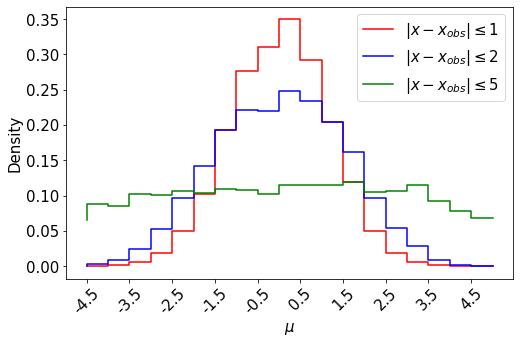

In [10]:
fig=plt.figure(figsize=(8,5), facecolor='white')
plt.rcParams.update({'font.size': 15})

plt.step(range(len(p1)), p1, c='r', lw=1.5, label=r'$|x - x_{obs}| \leq 1$')
plt.step(range(len(p2)), p2, c='b', lw=1.5, label=r'$|x - x_{obs}| \leq 2$')
plt.step(range(len(p3)), p3, c='g', lw=1.5, label=r'$|x - x_{obs}| \leq 5$')
ax = plt.gca()
ax.set_xticks(range(20)[::2]);
ax.set_xticklabels(np.arange(-4.5, 5, 1), rotation=45);
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'Density')
plt.legend();
#plt.savefig('ABC_ex')